# Project: Investigating No-show Medical Appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Our dataset contains records of medical appointments in which nearly 30% of patients didn't show up for their appointments.
Using pandas, numpy, and matplotlib, my aim in this investigation is to find which variables are likely to be related with this phenomena and to identify which variebles would be most important in predicting whether the patient would attend his/hir appointment or not.

### Questions that I am trying to answer in this report:
<br>**1- How many appointments were canceled in total?**
<br>**2- In general, which categories seem to be related most with successful and unsuccessful appointments?**

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#showing graphs inline with code
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Gathering & assessing data

In [2]:
#importing csv file as no_show
no_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#making sure it's imported correctly
print(no_show.shape)
print(no_show.head(2))

(110527, 14)
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  


In [4]:
#check null values and columns types
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#gathering some quick statistics about each column
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### There are 4 interesting observations in this dataset##

I. `Age` value of `-1`
>( according to dataset uploader on kaggle: -1 refers to a pregnant patient.)

II. `Handcap` values are not binary, rather they indicate number of disabilities patient has.

III. `No-show` column is a string type instead of boalean values.

IV. Date columns are in string type. It won't need to be converted as I am interested only in personal variables in this project.

V. There is an extreme value in age `115`
> Accoarding to kaggle discussions I found that these values are just errors.

Dropping rows with age errors

In [6]:
#drop ages below 0
no_show.drop(no_show[(no_show['Age'] < 0) | (no_show['Age'] == 115)].index, inplace=True)

print(no_show.shape)

(110521, 14)


Dropping unnecessary columns

In [7]:
no_show.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

Converting No-show column to bolean for convenient analysis

In [8]:
no_show['No-show'] = no_show['No-show'].map(dict(Yes=True, No=False))

print(no_show['No-show'].head(3))

0    False
1    False
2    False
Name: No-show, dtype: bool


<a id='eda'></a>
## Exploratory Data Analysis

### How many appointments were canceled?

In [9]:
#count of canceled appointments
cancel_pct = no_show['No-show'].mean() * 100
cancel_pct

20.19163778829363

<a id='2'></a>
### In general, which variables are most related with successful and unsuccessful appointments?

**In the following few lines of code, I am going to make a simple for loop to visualize relationship between all columns and `No-show`**

In [10]:
print(no_show.columns)

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


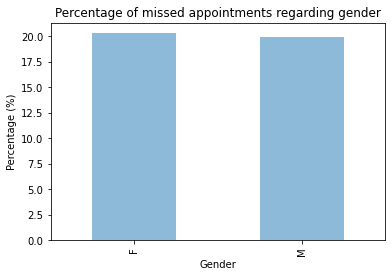

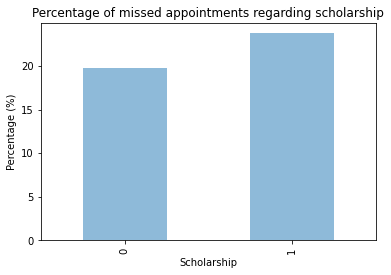

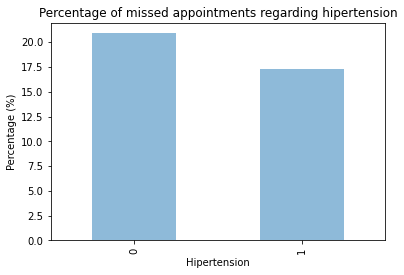

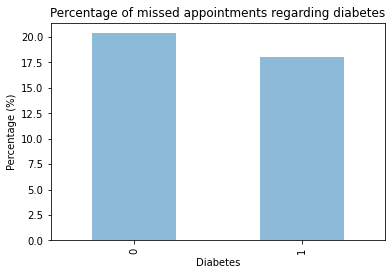

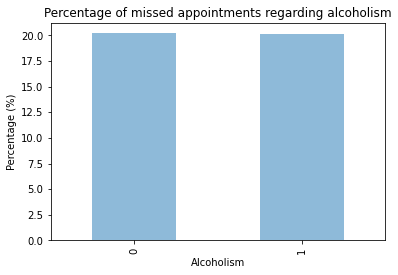

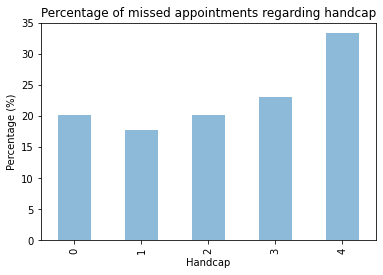

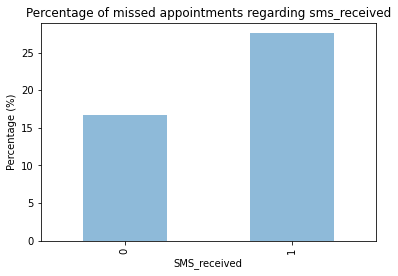

In [11]:
#making a list of wanted columns to iterate over
col_list = no_show.columns

#excluding No-show, age, and Neighbourhood columns as they will be plotted later in an appropriate format
col_list = np.delete(col_list,[1,2,-1])

#visualize relationship between remaining vars and appointment missing
for cat in col_list:
    no_show.groupby(cat)['No-show'].mean().multiply(100).plot.bar(alpha=0.5)
    plt.title('Percentage of missed appointments regarding ' + cat.lower())
    plt.ylabel('Percentage (%)')
    plt.show()

It appears that recieving an SMS and having a scholarship programme are in negative correlation with attending appointments!<br>
Also there is visual correlation between the degree of hanidcap and the chance of missing the appointment.<br>
Hypertension, diabietes columns show little difference in missing ratio.<br>
Alchoholism, and gender seem to have no effect on our dependant variable at all.

**Checking for percentage of not showing in each neighbourhood in a more clear figure:**

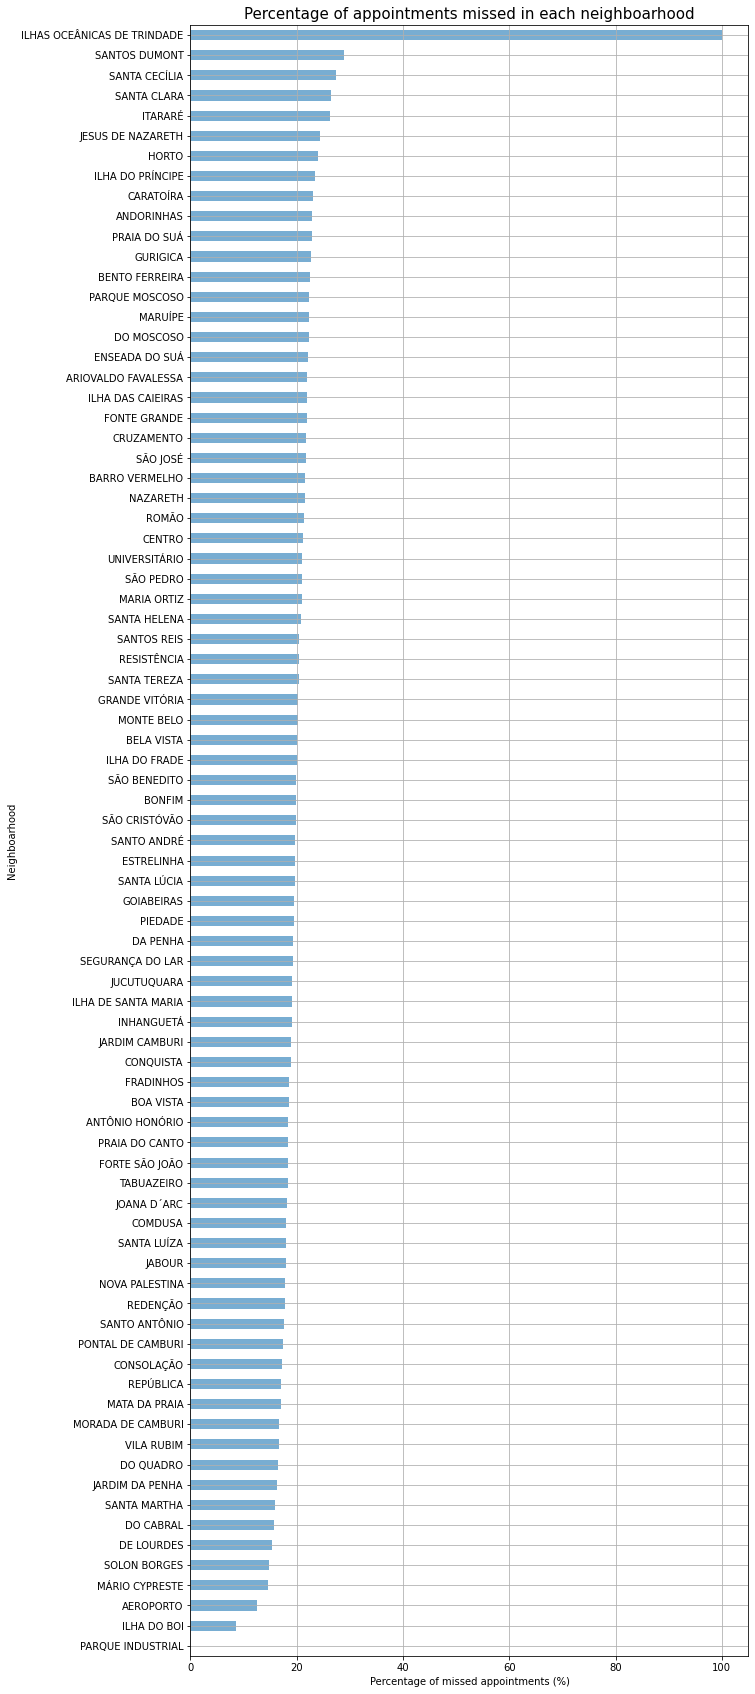

In [12]:
no_show.groupby('Neighbourhood')['No-show'].mean().multiply(100).sort_values().plot.barh(alpha=0.6, figsize=(10,30), grid=True)
plt.xlabel('Percentage of missed appointments (%)')
plt.ylabel('Neighboarhood')
plt.title('Percentage of appointments missed in each neighboarhood', fontsize=15);

Some neighborhood has much larger ratio of people missing their appointments.

In the following section we will check for `Age` relationship in a scatter plot

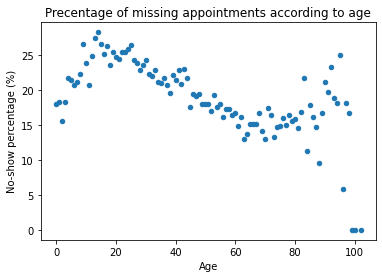

In [13]:
Age_no_show = no_show.groupby('Age')['No-show'].mean().multiply(100)
Age_no_show.to_frame().reset_index().plot.scatter(x=0, y=1)
plt.ylabel('No-show percentage (%)')
plt.title('Precentage of missing appointments according to age');

There is a curvilinear relationship between age and not-showing, teenagers has the worst percentages, but scores of old people seeme to be arbitrary.
In the next graph, I'm plotting number of patients who attended\missed in each age.

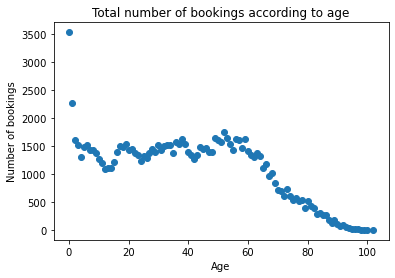

In [14]:
#Making a new data frame age_show to record total number of bookings
age_show = no_show.groupby('Age')['No-show'].count()

#plotting age_show
plt.scatter(age_show.index, age_show)
plt.title('Total number of bookings according to age')
plt.ylabel('Number of bookings')
plt.xlabel('Age');

That makes sense, number of patients > 90 years old are too low to give a representive sample. 

**Another important finding is that age has an effect on whether patient would attend or not.**

<a id='conclusions'></a>
## Conclusions

**1 of each 5 appointments is missed**. The most important features affecting missing appointment probability may be **whether the patient received SMS or not**, **neighborhood of the hospital**, and **patient age.**
<br>Other factors like scholarship, handicap may have some correlation.

<br> Provisional exploration showed a probabilty of negative correlation between recieving an SMS and attending the appointment.
<br> It seems that patients living in some neighborhoods have missed their appointments more than others.

<br>As shown in the last graph, teenagers have the highest risk to miss their appointment compared to other age categories, but this conclusion needs further in detail assessment, examination of correlation with ANOVA test would be an appropriate way to examine the correlation between age and missing appointments.

<br>**Limitations:**
<br> Numbers of pateints in categories such as scholarship, hypertension, diabetes, alcoholism, and handicap are too low and may lower the chance to conduct an accurate conclusion. Also number of patients after 90s drops significantly.
<br><br>Time series analysis was not made to investigate patterns in date that may have an effect of attending appointments.

<br>**Recommendations:**
<br>Chi-Square and ANOVA tests should be performed for further assessment of the nature of correlation between suggested variables.